In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries loaded successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries loaded successfully!


In [2]:
data_path = Path('../data/houses.xlsx')
df = pd.read_excel(data_path)

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

✅ Data loaded successfully!
📊 Dataset shape: 10 rows, 20 columns


In [4]:
df.head()
print("Column Names and Types:")
print("-" * 50)
df.info()

Column Names and Types:
--------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 10 non-null     str    
 1   location                    10 non-null     str    
 2   property_type               10 non-null     str    
 3   bedrooms                    10 non-null     int64  
 4   bathrooms                   10 non-null     float64
 5   sqft                        10 non-null     int64  
 6   lot_size                    7 non-null      float64
 7   year_built                  10 non-null     int64  
 8   age                         10 non-null     int64  
 9   garage_spaces               10 non-null     int64  
 10  has_pool                    10 non-null     bool   
 11  has_fireplace               10 non-null     bool   
 12  renovated                   10 

In [5]:
df.describe()

,bedrooms,bathrooms,sqft,lot_size,year_built,age,garage_spaces,distance_to_school_miles,distance_to_transit_miles,distance_to_shopping_miles,days_on_market,price
count,10.000000,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.900000,2.100000,2201.100000,5642.857143,1989.600000,34.400000,1.800000,1.820000,1.800000,2.050000,46.700000,401000.000000
std,0.994429,0.875595,827.935377,1661.948097,16.780942,16.780942,1.135292,1.370158,0.995546,1.023339,24.000231,202257.811276
min,2.000000,1.000000,1137.000000,3184.000000,1970.000000,6.000000,0.000000,0.500000,0.300000,0.400000,8.000000,167000.000000
25%,3.250000,1.500000,1499.500000,4966.000000,1974.750000,23.000000,1.250000,0.825000,1.050000,1.350000,35.250000,224250.000000
50%,4.000000,2.000000,2223.000000,5302.000000,1988.000000,36.000000,2.000000,1.400000,1.850000,2.200000,49.500000,363500.000000
75%,4.750000,2.875000,2817.250000,6325.000000,2001.000000,49.250000,2.750000,2.300000,2.675000,2.775000,58.750000,575500.000000
max,5.000000,3.500000,3460.000000,8432.000000,2018.000000,54.000000,3.000000,4.700000,3.000000,3.300000,89.000000,712000.000000


In [6]:
# Cell 6: Check for missing values
print("Missing Values:")
print("-" * 50)
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("✅ No missing values!")

Missing Values:
--------------------------------------------------
lot_size    3
dtype: int64


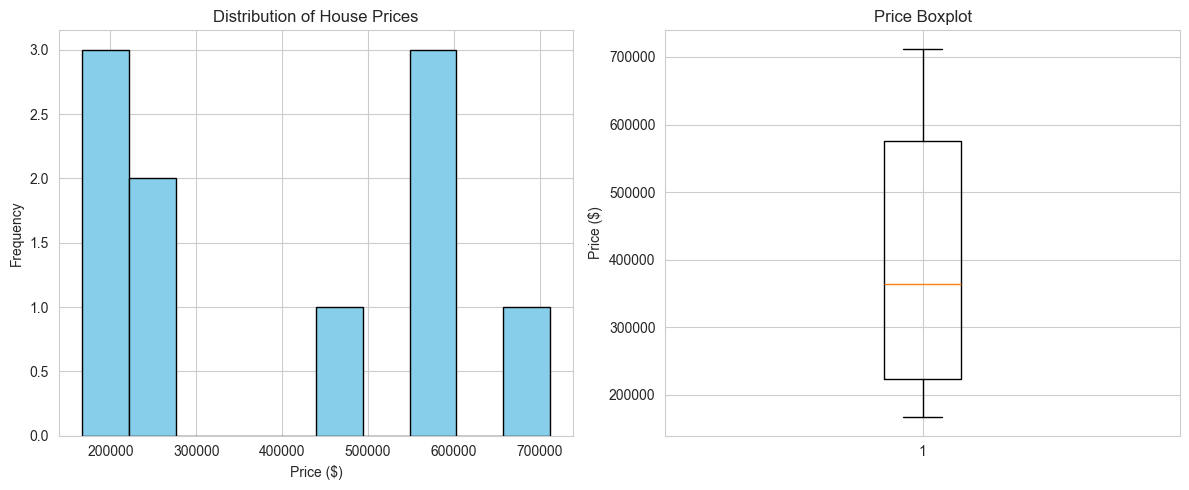

Mean Price: $401,000
Median Price: $363,500
Price Range: $167,000 - $712,000


In [7]:
# Cell 7: Price distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.ylabel('Price ($)')
plt.title('Price Boxplot')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"Mean Price: ${df['price'].mean():,.0f}")
print(f"Median Price: ${df['price'].median():,.0f}")
print(f"Price Range: ${df['price'].min():,} - ${df['price'].max():,}")

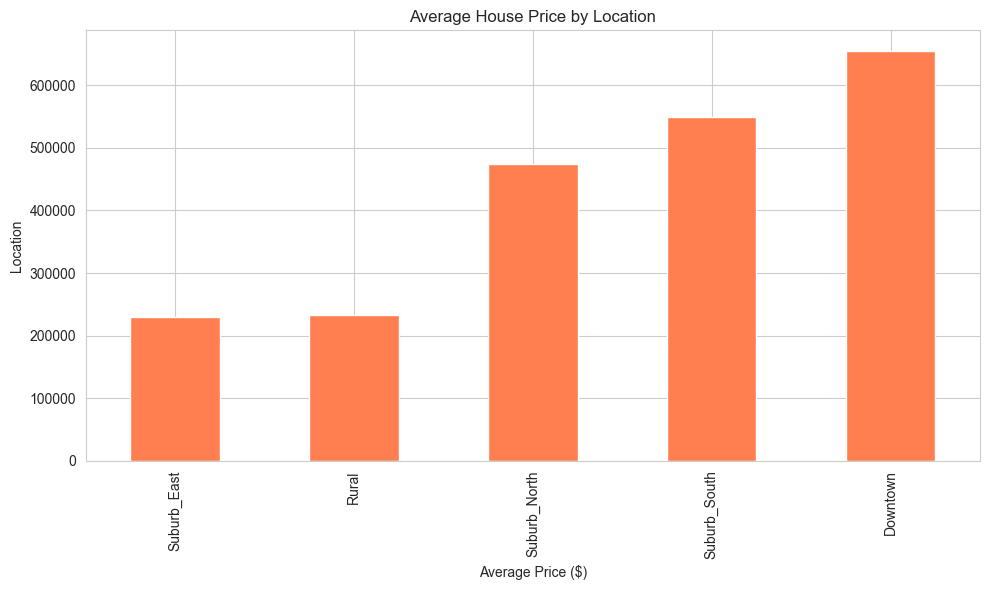

In [18]:
# Cell 8: Price by year built
plt.figure(figsize=(10, 6))
location_prices = df.groupby('location')['price'].median().sort_values()
location_prices.plot(kind='bar', color='coral')
plt.xlabel('Average Price ($)')
plt.ylabel('Location')
plt.title('Average House Price by Location')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

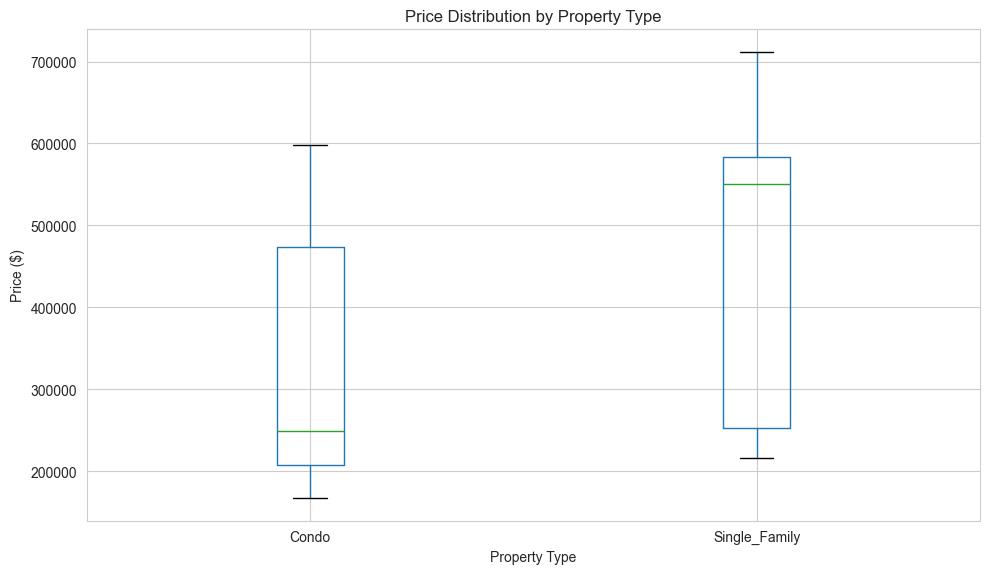

In [17]:
# Cell 9: Price by property type
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='property_type', figsize=(10, 6))
plt.suptitle('')
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Correlation with Price:
--------------------------------------------------
price                         1.000000
sqft                          0.871582
distance_to_school_miles      0.336270
year_built                    0.288869
bathrooms                     0.229944
garage_spaces                 0.209039
days_on_market                0.175128
distance_to_transit_miles    -0.193134
bedrooms                     -0.280635
age                          -0.288869
lot_size                     -0.363412
distance_to_shopping_miles   -0.396392
Name: price, dtype: float64


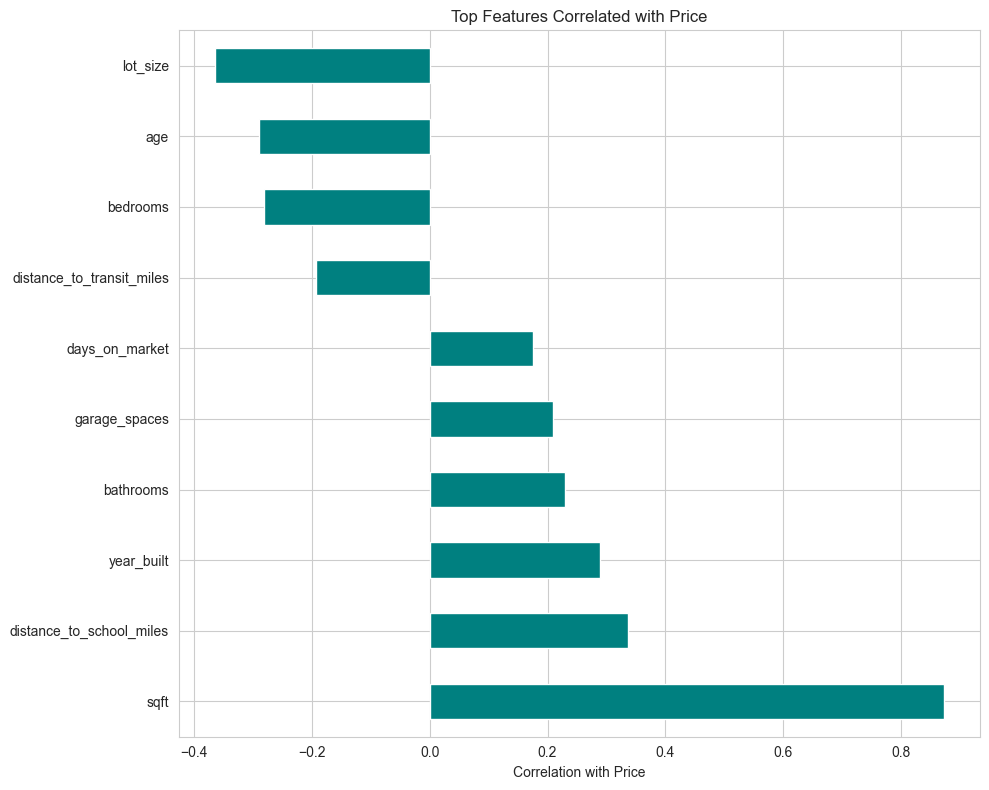

In [19]:
# Cell 10: Correlation analysis - Numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = df[numeric_cols].corr()['price'].sort_values(ascending=False)

print("Correlation with Price:")
print("-" * 50)
print(correlation)

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = correlation[1:11]  # Exclude price itself, show top 10
top_corr.plot(kind='barh', color='teal')
plt.xlabel('Correlation with Price')
plt.title('Top Features Correlated with Price')
plt.tight_layout()
plt.show()



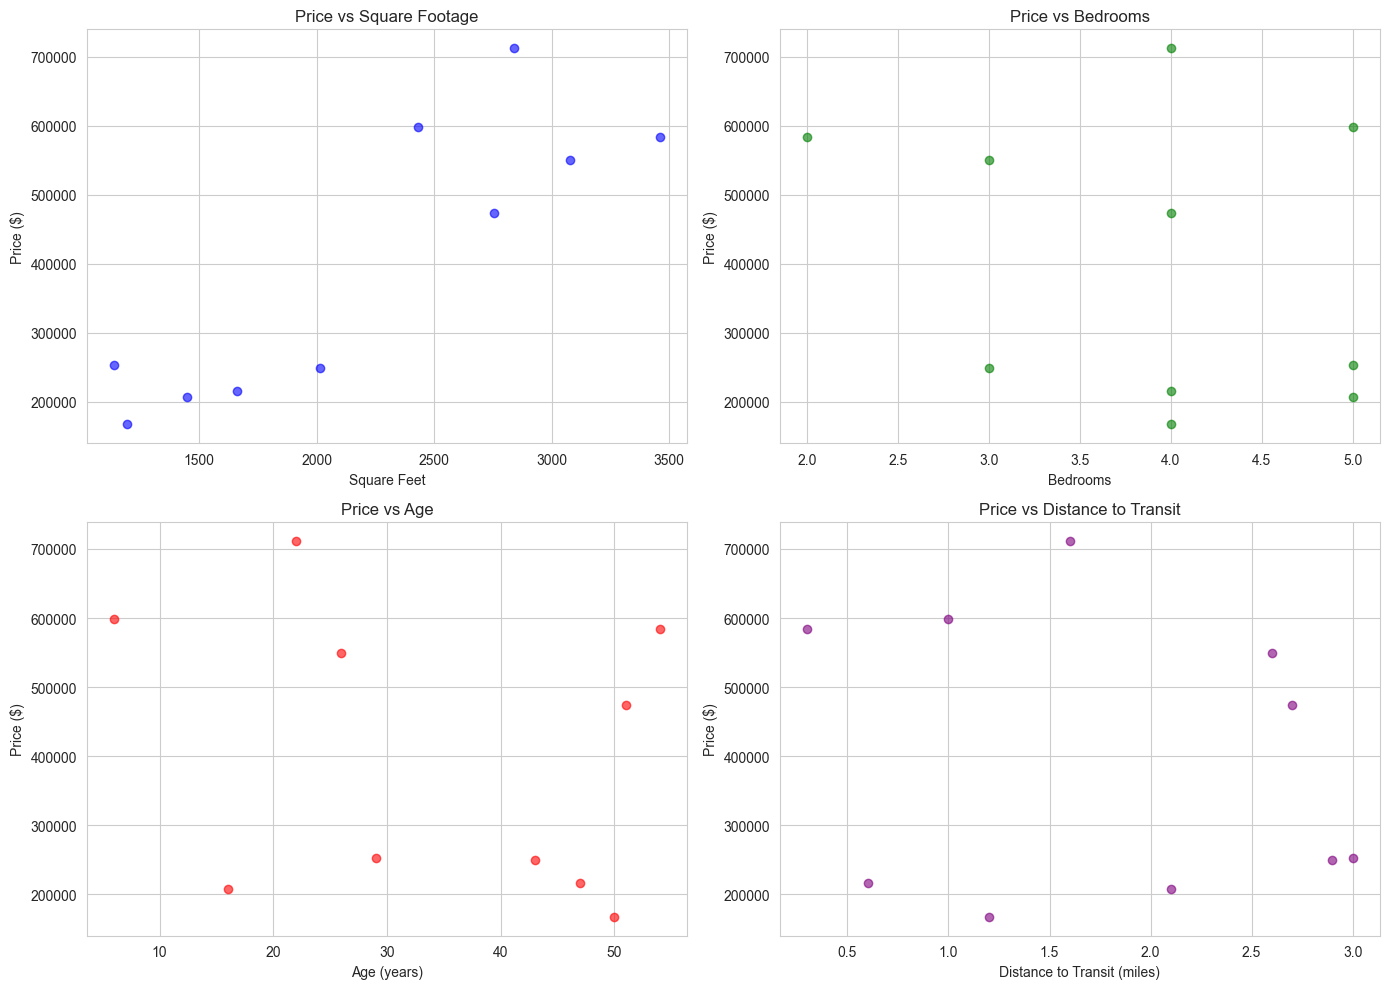

In [20]:
# Cell 11: Scatter plots - Key relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price vs Square Footage
axes[0, 0].scatter(df['sqft'], df['price'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Square Feet')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Square Footage')

# Price vs Bedrooms
axes[0, 1].scatter(df['bedrooms'], df['price'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Bedrooms')

# Price vs Age
axes[1, 0].scatter(df['age'], df['price'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Age (years)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Age')

# Price vs Distance to Transit
axes[1, 1].scatter(df['distance_to_transit_miles'], df['price'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Distance to Transit (miles)')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price vs Distance to Transit')

plt.tight_layout()
plt.show()

In [21]:
# Cell 12: Feature engineering ideas
print("🔧 Feature Engineering Ideas:")
print("-" * 50)

# Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft']
print(f"1. Price per sqft range: ${df['price_per_sqft'].min():.2f} - ${df['price_per_sqft'].max():.2f}")

# Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
print(f"2. Total rooms range: {df['total_rooms'].min():.1f} - {df['total_rooms'].max():.1f}")

# Is new (less than 10 years old)
df['is_new'] = df['age'] < 10
print(f"3. New properties: {df['is_new'].sum()} out of {len(df)}")

# Has lot (not None)
df['has_lot'] = df['lot_size'].notna()
print(f"4. Properties with lot: {df['has_lot'].sum()} out of {len(df)}")

# Location desirability score (based on distances)
df['location_score'] = (
    1 / (df['distance_to_school_miles'] + 0.1) +
    1 / (df['distance_to_transit_miles'] + 0.1) +
    1 / (df['distance_to_shopping_miles'] + 0.1)
)
print(f"5. Location score range: {df['location_score'].min():.2f} - {df['location_score'].max():.2f}")

print("\nNew features created successfully! ✅")
df[['property_id', 'price_per_sqft', 'total_rooms', 'is_new', 'location_score']].head()

🔧 Feature Engineering Ideas:
--------------------------------------------------
1. Price per sqft range: $123.57 - $250.88
2. Total rooms range: 4.0 - 8.0
3. New properties: 1 out of 10
4. Properties with lot: 7 out of 10
5. Location score range: 0.95 - 4.15

New features created successfully! ✅


,property_id,price_per_sqft,total_rooms,is_new,location_score
0,PROP_001,130.120482,6.5,False,2.261905
1,PROP_002,123.573201,4.5,False,2.352564
2,PROP_003,143.153527,6.0,False,1.954545
3,PROP_004,172.050817,7.5,False,0.950092
4,PROP_005,222.515391,8.0,False,1.736722


In [24]:
# Cell 13: Document your findings
findings = """
🎯 KEY OBSERVATIONS FROM DATA EXPLORATION:

1. DATASET OVERVIEW:
   - Total properties: {n_properties}
   - Price range: ${min_price:,} - ${max_price:,}
   - Average price: ${avg_price:,.0f}

2. LOCATION INSIGHTS:
   - Most expensive location: {most_expensive_location}
   - Least expensive location: {least_expensive_location}
   
3. PROPERTY CHARACTERISTICS:
   - Square footage strongly correlates with price
   - Newer properties (< 10 years) tend to be pricier
   - Pool and garage spaces add significant value
   
4. MISSING DATA:
   - Some properties don't have lot_size information
   - This is realistic (e.g., condos don't have lots)

5. NEXT STEPS FOR MODEL:
   - Handle missing lot_size values (impute or flag)
   - Encode categorical variables (location, property_type)
   - Consider feature engineering (price per sqft, location score)
   - Split data: 8 for training, 2 for testing
   
6. MODEL FEATURES TO USE:
   Primary: sqft, bedrooms, bathrooms, location, property_type
   Secondary: age, garage_spaces, has_pool, has_fireplace
   Engineered: price_per_sqft, location_score, is_new
"""

location_avg = df.groupby('location')['price'].mean().sort_values()

print(findings.format(
    n_properties=len(df),
    min_price=df['price'].min(),
    max_price=df['price'].max(),
    avg_price=df['price'].mean(),
    most_expensive_location=location_avg.index[-1],
    least_expensive_location=location_avg.index[0]
))


🎯 KEY OBSERVATIONS FROM DATA EXPLORATION:

1. DATASET OVERVIEW:
   - Total properties: 10
   - Price range: $167,000 - $712,000
   - Average price: $401,000

2. LOCATION INSIGHTS:
   - Most expensive location: Downtown
   - Least expensive location: Suburb_East

3. PROPERTY CHARACTERISTICS:
   - Square footage strongly correlates with price
   - Newer properties (< 10 years) tend to be pricier
   - Pool and garage spaces add significant value

4. MISSING DATA:
   - Some properties don't have lot_size information
   - This is realistic (e.g., condos don't have lots)

5. NEXT STEPS FOR MODEL:
   - Handle missing lot_size values (impute or flag)
   - Encode categorical variables (location, property_type)
   - Consider feature engineering (price per sqft, location score)
   - Split data: 8 for training, 2 for testing

6. MODEL FEATURES TO USE:
   Primary: sqft, bedrooms, bathrooms, location, property_type
   Secondary: age, garage_spaces, has_pool, has_fireplace
   Engineered: price_per_s

In [29]:
correlation = df['distance_to_school_miles'].corr(df['price'])
print(f"Correlation between distance to school and price: {correlation}")

Correlation between distance to school and price: 0.3362700083273793
